In [20]:
library(celda)
library(dplyr)
library(forcats)
library(glmGamPoi)
library(limma)
library(SingleCellExperiment)
library(stringr)

In [21]:
setwd("~/Upd-Germline-Genomics")

In [22]:
library(Matrix) # for t(ann$X)
library(MatrixGenerics)
library(reticulate)
library(Seurat)

use_virtualenv("r-reticulate")
anndata <- import("anndata")

ann <- anndata$read_h5ad("testis.h5ad")
wt.counts <- t(ann$X)
dimnames(wt.counts) <- list(rownames(ann$var), rownames(ann$obs))

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘sp’


The following object is masked from ‘package:IRanges’:

    %over%


‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


The following object is masked from ‘package:GenomicRanges’:

    intersect


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following object is masked from ‘package:IRanges’:

    intersect


The following object is masked from ‘package:S4Vectors’:

    intersect


The following object is masked from ‘package:BiocGenerics’:

    intersect


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assay

In [23]:
print(levels(ann$obs$annotation))
annotation <- ann$obs$annotation

 [1] "adult fat body"                               
 [2] "adult tracheal cell"                          
 [3] "cyst cell branch a"                           
 [4] "cyst cell branch b"                           
 [5] "cyst cell intermediate"                       
 [6] "cyst stem cell"                               
 [7] "early cyst cell 1"                            
 [8] "early cyst cell 2"                            
 [9] "early elongation stage spermatid"             
[10] "early-mid elongation-stage spermatid"         
[11] "head cyst cell"                               
[12] "hemocyte"                                     
[13] "late cyst cell branch a"                      
[14] "late cyst cell branch b"                      
[15] "late primary spermatocyte"                    
[16] "male gonad associated epithelium"             
[17] "mid-late elongation-stage spermatid"          
[18] "mid-late proliferating spermatogonia"         
[19] "muscle cell"                            

In [24]:
batch <- factor(
  str_extract(colnames(wt.counts), "Fuller.*(sample[123])", group=1) %>%
    replace(
      is.na(.),
      str_extract(colnames(wt.counts)[is.na(.)], "FCA_P")
    ),
  c("sample1", "sample2", "sample3", "FCA_P")
)
summary(batch)
(sce <- SingleCellExperiment(list(counts = wt.counts), colData = data.frame(batch=batch)))
sce <- decontX(sce, batch = sce$batch)

sample1 sample2 sample3   FCA_P 
  14827   13931   14696     374

class: SingleCellExperiment 
dim: 15523 43828 
metadata(0):
assays(1): counts
rownames(15523): 128up 14-3-3epsilon ... zyd zye
rowData names(0):
colnames(43828):
  AAACCCACACGGCGTT-6e669170__FCA59_Male_testis_adult_1dWT_Fuller_sample1
  AAACCCACATTACTCT-6e669170__FCA59_Male_testis_adult_1dWT_Fuller_sample1
  ... FCA_P51_male_testis_P8 FCA_P51_male_testis_P9
colData names(1): batch
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

--------------------------------------------------

Starting DecontX

--------------------------------------------------

Wed Jul 23 11:36:31 2025 .. Analyzing cells in batch 'sample1'

Wed Jul 23 11:36:31 2025 .... Converting to sparse matrix

Wed Jul 23 11:36:31 2025 .... Generating UMAP and estimating cell types

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Wed Jul 23 11:37:00 2025 .... Estimating contamination

Wed Jul 23 11:37:02 2025 ...... Completed iteration: 10 | converge: 0.02655

Wed Jul 23 11:37:03 2025 ...... Completed iteration: 20 | converge: 0.01059

Wed Jul 23 11:37:05 2025 ...... Completed iteration: 30 | converge: 0.006595

Wed Jul 23 11:37:06 2025 ...... Completed iterati

In [25]:
wt <- as.Seurat(sce, counts = "decontXcounts", data = NULL)

Warning message:
“Key ‘UMAP_’ taken, using ‘decontxsample2umap_’ instead”
Warning message:
“Key ‘UMAP_’ taken, using ‘decontxsample3umap_’ instead”
Warning message:
“Key ‘UMAP_’ taken, using ‘decontxfcapumap_’ instead”


In [26]:
Idents(wt) <- annotation
saveRDS(wt, "testis1d.rds")

In [27]:
print(tibble::enframe(levels(annotation)), n=100)

# A tibble: 36 × 2
    name value                                        
   <int> <chr>                                        
 1     1 adult fat body                               
 2     2 adult tracheal cell                          
 3     3 cyst cell branch a                           
 4     4 cyst cell branch b                           
 5     5 cyst cell intermediate                       
 6     6 cyst stem cell                               
 7     7 early cyst cell 1                            
 8     8 early cyst cell 2                            
 9     9 early elongation stage spermatid             
10    10 early-mid elongation-stage spermatid         
11    11 head cyst cell                               
12    12 hemocyte                                     
13    13 late cyst cell branch a                      
14    14 late cyst cell branch b                      
15    15 late primary spermatocyte                    
16    16 male gonad associated epithelium     

In [28]:
write(deparse(levels(annotation)[c(34,18,35,24:31,9:10,17)]), stdout())

c("spermatogonium", "mid-late proliferating spermatogonia", "spermatogonium-spermatocyte transition", 
"spermatocyte 0", "spermatocyte 1", "spermatocyte 2", "spermatocyte 3", 
"spermatocyte 4", "spermatocyte 5", "spermatocyte 6", "spermatocyte 7a", 
"early elongation stage spermatid", "early-mid elongation-stage spermatid", 
"mid-late elongation-stage spermatid")


In [29]:
table(annotation, batch)

                                               batch
annotation                                      sample1 sample2 sample3 FCA_P
  adult fat body                                     31      48      30     0
  adult tracheal cell                               228     189     202     5
  cyst cell branch a                                 91      93     115     3
  cyst cell branch b                                115     102      94     1
  cyst cell intermediate                            598     509     690    17
  cyst stem cell                                    112     104     128     3
  early cyst cell 1                                 229     219     209     6
  early cyst cell 2                                 122     117     114     0
  early elongation stage spermatid                 2306    2128    2247    74
  early-mid elongation-stage spermatid              319     298     328     4
  head cyst cell                                    462     439     464    11
  hemocyte 

In [30]:
library(MatrixGenerics)
(summarized <- pseudobulk(sce, vars(batch, annotation), aggregation_functions = list(counts = rowSums2, decontXcounts = rowSums2)))

Aggregating assay 'counts' using 'custom function'.



Aggregating assay 'decontXcounts' using 'custom function'.

Aggregating reducedDim 'decontX_sample1_UMAP' using 'rowMeans'.

Aggregating reducedDim 'decontX_sample2_UMAP' using 'rowMeans'.

Aggregating reducedDim 'decontX_sample3_UMAP' using 'rowMeans'.

Aggregating reducedDim 'decontX_FCA_P_UMAP' using 'rowMeans'.



class: SingleCellExperiment 
dim: 15523 142 
metadata(0):
assays(2): counts decontXcounts
rownames(15523): 128up 14-3-3epsilon ... zyd zye
rowData names(0):
colnames(142): sample1.male gonad associated epithelium
  sample1.mid-late elongation-stage spermatid ... FCA_P.spermatocyte 4
  FCA_P.secretory cell of the male reproductive tract
colData names(2): batch annotation
reducedDimNames(4): decontX_sample1_UMAP decontX_sample2_UMAP
  decontX_sample3_UMAP decontX_FCA_P_UMAP
mainExpName: NULL
altExpNames(0):

In [38]:
(summarized_gross_total <- pseudobulk(sce, vars(annotation), aggregation_functions = list(counts = rowSums2, decontXcounts = rowSums2)))
colnames(summarized_gross_total)

Aggregating assay 'counts' using 'custom function'.

Aggregating assay 'decontXcounts' using 'custom function'.

Aggregating reducedDim 'decontX_sample1_UMAP' using 'rowMeans'.

Aggregating reducedDim 'decontX_sample2_UMAP' using 'rowMeans'.

Aggregating reducedDim 'decontX_sample3_UMAP' using 'rowMeans'.

Aggregating reducedDim 'decontX_FCA_P_UMAP' using 'rowMeans'.



class: SingleCellExperiment 
dim: 15523 36 
metadata(0):
assays(2): counts decontXcounts
rownames(15523): 128up 14-3-3epsilon ... zyd zye
rowData names(0):
colnames(36): male gonad associated epithelium mid-late
  elongation-stage spermatid ... late cyst cell branch a adult fat body
colData names(1): annotation
reducedDimNames(4): decontX_sample1_UMAP decontX_sample2_UMAP
  decontX_sample3_UMAP decontX_FCA_P_UMAP
mainExpName: NULL
altExpNames(0):

[1] "male gonad associated epithelium"             
 [2] "mid-late elongation-stage spermatid"          
 [3] "spermatid"                                    
 [4] "unknown"                                      
 [5] "early elongation stage spermatid"             
 [6] "cyst cell intermediate"                       
 [7] "pigment cell"                                 
 [8] "spermatocyte"                                 
 [9] "adult tracheal cell"                          
[10] "head cyst cell"                               
[11] "muscle cell"                                  
[12] "spermatocyte 2"                               
[13] "spermatogonium"                               
[14] "secretory cell of the male reproductive tract"
[15] "early cyst cell 1"                            
[16] "late primary spermatocyte"                    
[17] "spermatocyte 7a"                              
[18] "spermatocyte cyst cell branch b"              
[19] "spermatocyte cyst cell branch a"              
[20] "early-mid elongation-stage spermatid"         
[21] "hemocyte"                                     
[22] "spermatocyte 0"                               
[23] "early cyst cell 2"                            
[24] "cyst stem cell"                               
[25] "spermatocyte 1"                               
[26] "spermatocyte 6"                               
[27] "mid-late proliferating spermatogonia"         
[28] "spermatogonium-spermatocyte transition"       
[29] "cyst cell branch b"                           
[30] "cyst cell branch a"                           
[31] "late cyst cell branch b"                      
[32] "spermatocyte 3"                               
[33] "spermatocyte 5"                               
[34] "spermatocyte 4"                               
[35] "late cyst cell branch a"                      
[36] "adult fat body"

In [31]:
library(limma)
head(
  (
    lm <- lmFit(
      log(assay(summarized, "decontXcounts"))[, summarized$batch != "FCA_P"],
      subset(
        model.matrix(~ 0 + annotation + batch, colData(summarized)),
        summarized$batch != "FCA_P",
        select = -batchFCA_P
      )
    )
  )$coefficients
)

Warning message:
“Partial NA coefficients for 10866 probe(s)”


,annotationadult fat body,annotationadult tracheal cell,annotationcyst cell branch a,annotationcyst cell branch b,annotationcyst cell intermediate,annotationcyst stem cell,annotationearly cyst cell 1,annotationearly cyst cell 2,annotationearly elongation stage spermatid,annotationearly-mid elongation-stage spermatid,⋯,annotationspermatocyte 5,annotationspermatocyte 6,annotationspermatocyte 7a,annotationspermatocyte cyst cell branch a,annotationspermatocyte cyst cell branch b,annotationspermatogonium,annotationspermatogonium-spermatocyte transition,annotationunknown,batchsample2,batchsample3
128up,1.8142640,3.213685,0.1819429,0.4011659,-3.098416,NA,0.6239389,1.394888,6.897048,4.7769297,⋯,3.664591,3.0040417,3.890769,1.305295,0.8189943,4.712853,3.344560,4.477729,0.81888229,0.51283134
14-3-3epsilon,5.3140243,7.014569,6.6917422,6.6565718,8.284844,7.289364,7.7232764,6.998530,9.647816,7.6756998,⋯,5.771149,5.6820313,6.842769,7.121466,6.3183522,8.087183,6.773634,7.774854,-0.04905309,-0.09753202
14-3-3zeta,4.5192487,7.349443,5.9405198,6.2417913,7.979904,7.178544,7.6406941,6.719419,8.743334,6.7290416,⋯,4.333515,3.7900083,5.611439,6.653233,5.8773662,7.293505,6.088321,7.457410,-0.04462355,-0.05746834
140up,0.9978578,2.132364,0.9604994,2.1598812,-3.073873,1.987501,2.8724565,2.918550,6.028683,4.0727656,⋯,3.216895,2.7157506,2.954382,2.714089,1.5386151,4.347409,2.982496,3.637699,0.02160886,0.21469935
18SrRNA-Psi:CR41602,2.2453512,2.358935,2.2102081,2.2579855,4.639362,2.181282,3.5436357,2.961712,5.731590,3.1331852,⋯,1.951838,2.1089436,5.117632,2.678344,2.2240076,3.872893,3.154543,3.670325,0.07077730,-0.19685543
18w,-0.7591833,7.103690,2.4907003,3.1365304,6.846097,6.526905,8.0759052,6.725990,2.096979,0.3530108,⋯,-14.603437,0.1807476,-8.712533,4.512785,4.1972073,NA,NA,2.613817,0.31069088,-5.26773825


In [32]:
logCPM <- subset(lm$coefficients, select = -c(batchsample2, batchsample3))
logCPM <- logCPM + 2*log(1000) - rep(colLogSumExps(logCPM, na.rm=T), each = nrow(logCPM))
logCPM <- logCPM / log(10)
logCPM[c("nos", "vas", "bam", "can", "tj", "eya"), ]

,annotationadult fat body,annotationadult tracheal cell,annotationcyst cell branch a,annotationcyst cell branch b,annotationcyst cell intermediate,annotationcyst stem cell,annotationearly cyst cell 1,annotationearly cyst cell 2,annotationearly elongation stage spermatid,annotationearly-mid elongation-stage spermatid,⋯,annotationspermatocyte 3,annotationspermatocyte 4,annotationspermatocyte 5,annotationspermatocyte 6,annotationspermatocyte 7a,annotationspermatocyte cyst cell branch a,annotationspermatocyte cyst cell branch b,annotationspermatogonium,annotationspermatogonium-spermatocyte transition,annotationunknown
nos,1.05129142,-3.828690,NA,NA,-21.615434,NA,NA,NA,0.5546188,-0.1526972,⋯,1.2185538,1.0838066,0.7602310,0.5893842,0.1321814,NA,NA,2.10429221,2.0314698,-0.06180928
vas,1.23327233,-3.649033,-15.202056,-15.0120134,-22.553581,NA,NA,-14.899424,1.1053748,0.5719519,⋯,1.8450760,1.5067083,1.1669143,0.6882314,0.3408969,-14.4158660,-14.5053686,2.28155241,2.1152012,0.44820301
bam,0.03630704,-3.666490,-14.387043,NA,-21.549844,NA,NA,NA,0.7732530,0.2390060,⋯,1.6011356,1.4422754,1.2786015,0.5669074,0.2016980,-14.8261321,-14.3213060,1.73365742,2.0625399,0.12615505
can,0.73286063,-3.561896,-14.780328,-14.7056814,-22.199541,NA,NA,NA,1.2268296,0.6957109,⋯,2.0893359,1.9484268,1.8798357,1.7990985,1.1915335,-14.4985479,-14.8216266,0.37965395,0.7505699,0.19545909
tj,0.54991986,-3.697388,NA,-0.4725438,-14.870889,1.7070011,1.790769,1.431358,-0.3609002,-0.1933458,⋯,-0.6749898,-0.3028155,0.2699549,0.3891375,-0.1402265,0.4075519,0.6281225,-0.03902323,0.3366850,-1.42110383
eya,0.84851105,-15.769075,1.892543,2.2048974,-4.704896,0.6110829,1.518505,1.906757,1.1663967,0.7675010,⋯,-0.4643443,0.8474252,1.2606097,1.4174216,1.0486569,2.1965936,2.1813569,-0.61873136,0.2180170,1.05537476


In [39]:
logCPM <- assay(summarized_gross_total)
logCPM <- logCPM * rep(1000^2 / colSums2(logCPM, na.rm=T), each = nrow(logCPM))
logCPM <- log10(logCPM)
logCPM[c("nos", "vas", "bam", "can", "tj", "eya"), ]

,male gonad associated epithelium,mid-late elongation-stage spermatid,spermatid,unknown,early elongation stage spermatid,cyst cell intermediate,pigment cell,spermatocyte,adult tracheal cell,head cyst cell,⋯,mid-late proliferating spermatogonia,spermatogonium-spermatocyte transition,cyst cell branch b,cyst cell branch a,late cyst cell branch b,spermatocyte 3,spermatocyte 5,spermatocyte 4,late cyst cell branch a,adult fat body
nos,-1.1128018,0.85678990,0.5078007,1.06904390,0.78310097,-0.85723432,-0.1637661,1.1937376,-0.30482366,-1.32993851,⋯,2.1071840,2.1600889,-Inf,-Inf,-0.36946083,1.4632469,1.2054302,1.3755652,-Inf,0.5045682
vas,0.5508188,1.17096338,1.2543064,1.51206848,1.30859296,-0.71758013,0.4664456,1.4176557,0.47579242,0.04354923,⋯,2.3640166,2.2509603,-0.3082620,0.20176936,0.41287668,2.0591176,1.5223881,1.8141976,-0.04004546,1.2975066
bam,0.1381579,0.82123656,1.1913151,1.17460643,0.96662376,-0.06277718,0.2055182,1.2030614,0.01437364,-0.26977378,⋯,2.2222370,2.1757519,-Inf,0.20661599,-0.35123950,1.8179943,1.6607421,1.7401834,-Inf,-0.2325207
can,0.6124888,1.38260246,1.5783872,1.31858832,1.53166794,-0.51333694,1.1180047,1.9536476,0.04437396,-0.36921125,⋯,0.8728739,0.9097616,0.5348262,-0.08180233,0.28927970,2.3858027,2.2171311,2.3593683,-0.26827960,1.1484790
tj,-0.8148982,-0.04726785,0.5726636,-0.07118544,0.04165853,-0.19153792,-Inf,0.7164847,0.16995017,-0.21913355,⋯,-0.3340239,0.5138474,0.3539308,-Inf,-0.05595518,-0.3342504,0.9011081,0.3488994,-Inf,0.7732197
eya,1.2204614,1.57120377,1.6008434,2.29444491,1.62120234,2.95635457,0.7842072,1.8255382,0.48057458,2.48411278,⋯,0.7887508,0.6487496,3.1451193,2.91049473,2.08213416,1.0315616,1.9233832,1.5378274,2.06400481,1.0285278


In [33]:
percentExpression <- do.call(
  cbind,
  sapply(
    levels(annotation),
    \(n) rowMeans2(assay(sce, "decontXcounts")[, annotation == n] != 0),
    simplify = FALSE
  )
)
percentExpression[1:10, 1:10]

,adult fat body,adult tracheal cell,cyst cell branch a,cyst cell branch b,cyst cell intermediate,cyst stem cell,early cyst cell 1,early cyst cell 2,early elongation stage spermatid,early-mid elongation-stage spermatid
128up,0.06422018,0.054487179,0.066225166,0.060897436,0.045755237,0.002881844,0.016591252,0.093484419,0.1002220577,0.165437302
14-3-3epsilon,0.60550459,0.741987179,0.980132450,0.977564103,0.859977949,0.804034582,0.900452489,0.983002833,0.6085862324,0.718651212
14-3-3zeta,0.39449541,0.799679487,0.850993377,0.958333333,0.806504961,0.763688761,0.891402715,0.946175637,0.3179866765,0.443624868
140up,0.01834862,0.020833333,0.056291391,0.073717949,0.025909592,0.008645533,0.034690799,0.099150142,0.0293116210,0.062170706
18SrRNA-Psi:CR41602,0.07339450,0.028846154,0.082781457,0.099358974,0.098125689,0.017291066,0.060331825,0.099150142,0.0223538120,0.022128556
18w,0.01834862,0.240384615,0.023178808,0.035256410,0.167034179,0.141210375,0.466063348,0.470254958,0.0007401925,0.004214963
26-29-p,0.33027523,0.198717949,0.423841060,0.448717949,0.551267916,0.146974063,0.289592760,0.382436261,0.2182087343,0.341412013
28SrRNA-Psi:CR40596,0.23853211,0.081730769,0.086092715,0.060897436,0.121278942,0.008645533,0.009049774,0.033994334,0.1028867506,0.120126449
28SrRNA-Psi:CR40741,0.01834862,0.004807692,0.006622517,0.006410256,0.005512679,0.000000000,0.006033183,0.005665722,0.0062176166,0.009483667
28SrRNA-Psi:CR41609,0.00000000,0.000000000,0.000000000,0.003205128,0.001102536,0.000000000,0.001508296,0.000000000,0.0004441155,0.002107482


In [34]:
targets::tar_load(c(Upd_cpm, Upd_decontX))

In [35]:
upd_tumor <- CreateSeuratObject(
  Upd_decontX,
  "DECONTX",
  meta.data = read.csv("scRNA-seq-Metadata.csv", row.names=1)
)

In [36]:
head(
  percent_upd_tumor <- sapply(
    c("germline", "somatic"),
    \(n) rowMeans2(
      GetAssayData(upd_tumor, layer = "counts")[, upd_tumor$ident == n] != 0
    )
  )
)

,germline,somatic
H3-GFP,0.172375792,0.111729815
lncRNA:CR40469,0.058315731,0.093088004
CG17636,0.001561209,0.001089456
RhoGAP1A,0.127651759,0.153855465
tyn,0.166314629,0.105677279
lncRNA:CR45473,0.012489668,0.049993947


In [43]:
load("illustrations/snRNA_seq_Dot_Plot_Data.rda")

In [44]:
annotations_take <- c(
  sg = "spermatogonium",
  st = "spermatogonium-spermatocyte transition",
  s1 = "spermatocyte 1",
  s3 = "spermatocyte 3",
  es = "early elongation stage spermatid",
  cs = "cyst stem cell",
  c1 = "early cyst cell 1",
  c2 = "early cyst cell 2"
)
targets::tar_load(Upd_cpm)
print(
  data <- bind_rows(
    sapply(
      genelist <- c("nos", "vas", "esg", "stg", "dany", "can", "comr", "zfh1", "tj", "eya"),
      \(gene) rbind(
        tibble(
          name = names(annotations_take),
          fullname = c(annotations_take),
          gene,
          logCPM = logCPM[gene[1], paste0("annotation", fullname)],
          percent = percentExpression[gene[1], fullname],
        ),
        tibble(
          name = c("G*", "C*"),
          fullname = c("GSC-like", "CySC-like"),
          gene,
          logCPM = log10(Upd_cpm[gene[1], 1:2]),
          percent = percent_upd_tumor[gene[1], 1:2],
        )
      ),
      simplify = FALSE
    )
  ) %>%
    mutate(
      name = name %>% factor(c("G*", "C*", names(annotations_take))) %>% fct_relevel("C*", after = 6L),
    ),
  n = 50
)

# A tibble: 100 × 5
   name  fullname                               gene    logCPM percent
   <fct> <chr>                                  <chr>    <dbl>   <dbl>
 1 sg    spermatogonium                         nos     2.10   0.462  
 2 st    spermatogonium-spermatocyte transition nos     2.03   0.333  
 3 s1    spermatocyte 1                         nos     1.89   0.503  
 4 s3    spermatocyte 3                         nos     1.22   0.387  
 5 es    early elongation stage spermatid       nos     0.555  0.00873
 6 cs    cyst stem cell                         nos    NA      0      
 7 c1    early cyst cell 1                      nos    NA      0      
 8 c2    early cyst cell 2                      nos    NA      0      
 9 G*    GSC-like                               nos     2.34   0.517  
10 C*    CySC-like                              nos    -0.273  0.0662 
11 sg    spermatogonium                         vas     2.28   0.636  
12 st    spermatogonium-spermatocyte transition vas     2

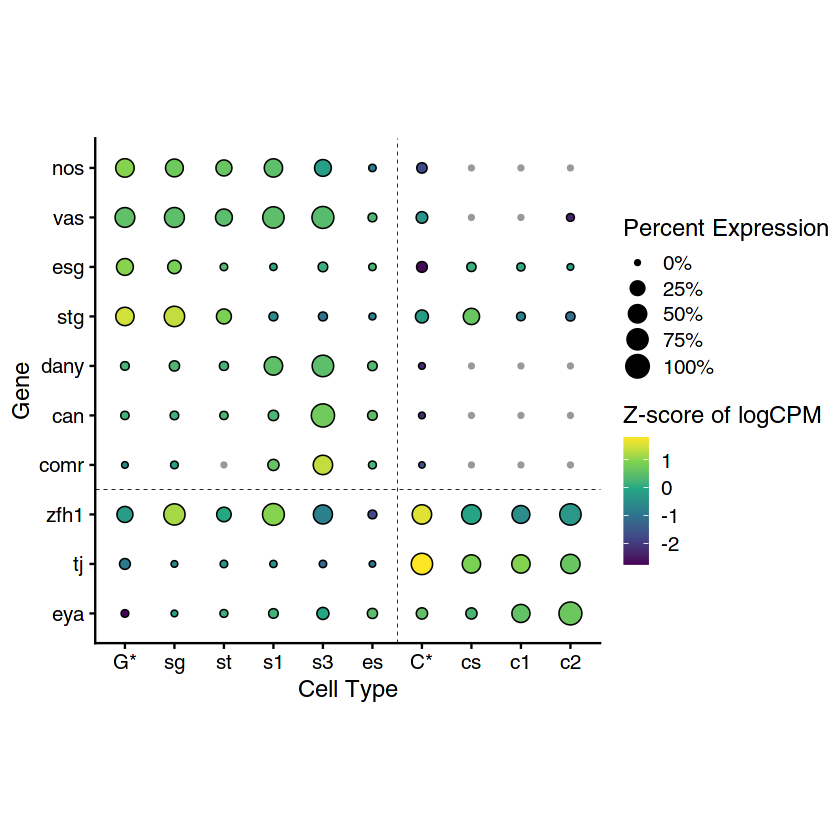

In [63]:
library(cowplot)
library(ggnewscale)
library(ggplot2)
ggplot(
  data %>% group_by(gene) %>% mutate(Z = c(scale(logCPM)), gene = factor(gene, genelist)),
  aes(name, gene, fill=Z, size=percent, color=ifelse(as.numeric(percent == 0), "zero", "nonzero"))
) +
  geom_point(shape=21) +
  scale_fill_viridis_c("Z-score of logCPM", na.value = "#999999") +
  scale_size_continuous("Percent Expression", limits = c(0, 1), labels = scales::percent, guide = guide_legend(override.aes = list(shape = 19))) +
  scale_color_manual(values = c(nonzero = "black", zero = "#999999"), guide = guide_none()) +
  # new_scale_fill() +
  # geom_point(aes(fill = Class), data.frame(name="es", gene="eya", percent=0.5))
  scale_y_discrete("Gene", limits = rev) +
  scale_x_discrete("Cell Type") +
  # annotate("segment", 1.5, -Inf, xend=1.5, yend=Inf, linetype="dashed", linewidth = 0.5 * 25.4 / 72) +
  annotate("segment", 6.5, -Inf, xend=6.5, yend=Inf, linetype="dashed", linewidth = 0.5 * 25.4 / 72) +
  annotate("segment", -Inf, 3.5, xend=Inf, yend=3.5, linetype="dashed", linewidth = 0.5 * 25.4 / 72) +
  theme_cowplot() +
  theme(aspect.ratio = 1)

In [64]:
library(Cairo)
library(grid)
CairoPDF("figure/snRNA_seq_Dot_Plot.pdf", w=6, h=4.5)
grid.draw(last_plot())
dev.off()

png 
  2

In [22]:
ls()

[1] "ann"               "anndata"           "annotation"       
 [4] "annotations_take"  "batch"             "data"             
 [7] "genelist"          "lm"                "logCPM"           
[10] "percent_upd_tumor" "percentExpression" "sce"              
[13] "summarized"        "Upd_cpm"           "Upd_decontX"      
[16] "upd_tumor"         "wt.counts"

In [20]:
args(save)

function (..., list = character(), file = stop("'file' must be specified"), 
    ascii = FALSE, version = NULL, envir = parent.frame(), compress = isTRUE(!ascii), 
    compression_level, eval.promises = TRUE, precheck = TRUE) 
NULL

In [21]:
save(logCPM, percentExpression, Upd_cpm, percent_upd_tumor, file = "illustrations/snRNA_seq_Dot_Plot_Data.rda")